In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt

In [2]:
train_1 = pd.read_csv(r'D:\UNIVERSITA\MAGISTRALE\Secondo anno\StatMachineLearning\WebTrafficForecasting\web-traffic-time-series-forecasting\train_1.csv')
print(train_1.head())

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09     ...      2016-12-22  2016-12-23  2016-

In [3]:
print(train_1.groupby('Page')['Page'].count())

Page
!vote_en.wikipedia.org_all-access_all-agents                                                        1
!vote_en.wikipedia.org_all-access_spider                                                            1
!vote_en.wikipedia.org_desktop_all-agents                                                           1
"Awaken,_My_Love!"_en.wikipedia.org_all-access_all-agents                                           1
"Awaken,_My_Love!"_en.wikipedia.org_all-access_spider                                               1
"Awaken,_My_Love!"_en.wikipedia.org_desktop_all-agents                                              1
"European_Society_for_Clinical_Investigation"_en.wikipedia.org_all-access_all-agents                1
"European_Society_for_Clinical_Investigation"_en.wikipedia.org_all-access_spider                    1
"European_Society_for_Clinical_Investigation"_en.wikipedia.org_desktop_all-agents                   1
"Heroes"_(David_Bowie_album)_en.wikipedia.org_all-access_all-agents          

In [4]:
for row in train_1['Page']:
    x = row.count('.org')
    if x > 1:
        print(row)

Special:MyLanguage/Wikipedia.org_updated_page_layout_www.mediawiki.org_all-access_all-agents
Wikipedia.org_Portal_www.mediawiki.org_all-access_all-agents
Wikipedia.org_add_mobile_app_badges_www.mediawiki.org_all-access_all-agents
Wikipedia.org_updated_page_layout_www.mediawiki.org_all-access_all-agents
Category:MediaWiki.org_website_www.mediawiki.org_all-access_all-agents
Category:MediaWiki.org_website/zh_www.mediawiki.org_all-access_all-agents
Talk:Wikipedia.org_add_mobile_app_badges_www.mediawiki.org_all-access_all-agents
Category:MediaWiki.org_website/zh_www.mediawiki.org_mobile-web_all-agents
Special:MyLanguage/-o-linear-gradient(transparent,transparent),url(/www.mediawiki.org/static/1.27.0-wmf.10/extensions/MobileFrontend/resources/skins.minerva.content.styles/images/external-link-ltr-icon.png_www.mediawiki.org_mobile-web_all-agents
Wikipedia.org_Portal_www.mediawiki.org_mobile-web_all-agents
Wikipedia.org_add_mobile_app_badges_www.mediawiki.org_mobile-web_all-agents
Category:Medi

In [5]:
new = train_1["Page"].str.rsplit(".org_", n = 1, expand = True)
print(new.head())

                               0                  1
0              2NE1_zh.wikipedia  all-access_spider
1               2PM_zh.wikipedia  all-access_spider
2                3C_zh.wikipedia  all-access_spider
3           4minute_zh.wikipedia  all-access_spider
4  52_Hz_I_Love_You_zh.wikipedia  all-access_spider


In [6]:
train_1['Page'] = new[0] + '.org'
print(train_1.Page.head())

0                2NE1_zh.wikipedia.org
1                 2PM_zh.wikipedia.org
2                  3C_zh.wikipedia.org
3             4minute_zh.wikipedia.org
4    52_Hz_I_Love_You_zh.wikipedia.org
Name: Page, dtype: object


In [7]:
train_1['Type_of_traffic'] = new[1]
print(train_1.Type_of_traffic.head())

0    all-access_spider
1    all-access_spider
2    all-access_spider
3    all-access_spider
4    all-access_spider
Name: Type_of_traffic, dtype: object


In [8]:
new = train_1["Type_of_traffic"].str.split("_", n = 1, expand = True)
print(new.head())

            0       1
0  all-access  spider
1  all-access  spider
2  all-access  spider
3  all-access  spider
4  all-access  spider


In [9]:
train_1['Type_of_traffic'] = new[0]
train_1['Agent'] = new[1]
print(train_1[['Page', 'Type_of_traffic', 'Agent']].head())

                                Page Type_of_traffic   Agent
0              2NE1_zh.wikipedia.org      all-access  spider
1               2PM_zh.wikipedia.org      all-access  spider
2                3C_zh.wikipedia.org      all-access  spider
3           4minute_zh.wikipedia.org      all-access  spider
4  52_Hz_I_Love_You_zh.wikipedia.org      all-access  spider


In [10]:
def get_location(regex, series):
    data = pd.DataFrame([])
    for row in series:
        if re.search(regex, row):
            data = data.append(pd.DataFrame({'location': re.search(regex, row).group(1)}, index=[0]), ignore_index=True) 
        else:
            data = data.append(pd.DataFrame({'location': 'na'}, index=[0]), ignore_index=True)
    return data

In [11]:
new = get_location(r'.+_(\w{2})\.wiki', train_1['Page'])
train_1['location'] = new['location']
print(train_1.location.head())

0    zh
1    zh
2    zh
3    zh
4    zh
Name: location, dtype: object


In [12]:
print(train_1.location.unique())

['zh' 'fr' 'en' 'na' 'ru' 'de' 'ja' 'es']


In [13]:
train_1_melted = pd.melt(train_1, id_vars=['Page', 'Type_of_traffic', 'Agent', 'location'], var_name='Date', value_name='count')

In [14]:
print(train_1_melted.head())

                                Page Type_of_traffic   Agent location  \
0              2NE1_zh.wikipedia.org      all-access  spider       zh   
1               2PM_zh.wikipedia.org      all-access  spider       zh   
2                3C_zh.wikipedia.org      all-access  spider       zh   
3           4minute_zh.wikipedia.org      all-access  spider       zh   
4  52_Hz_I_Love_You_zh.wikipedia.org      all-access  spider       zh   

         Date  count  
0  2015-07-01   18.0  
1  2015-07-01   11.0  
2  2015-07-01    1.0  
3  2015-07-01   35.0  
4  2015-07-01    NaN  


In [15]:
print(train_1_melted.groupby(['Type_of_traffic', 'Agent']).count())

                                Page  location      Date     count
Type_of_traffic Agent                                             
all-access      all-agents  21671100  21671100  21671100  19955973
                spider      19202150  19202150  19202150  17820399
desktop         all-agents  19144950  19144950  19144950  17464320
mobile-web      all-agents  19766450  19766450  19766450  18351027


In [16]:
print(train_1_melted.groupby(['Page']).count().head())

                                                    Type_of_traffic  Agent  \
Page                                                                         
!vote_en.wikipedia.org                                         1650   1650   
"Awaken,_My_Love!"_en.wikipedia.org                            1650   1650   
"European_Society_for_Clinical_Investigation"_e...             1650   1650   
"Heroes"_(David_Bowie_album)_en.wikipedia.org                  1650   1650   
"Keep_me_logged_in"_extended_to_one_year_www.me...             2200   2200   

                                                    location  Date  count  
Page                                                                       
!vote_en.wikipedia.org                                  1650  1650   1578  
"Awaken,_My_Love!"_en.wikipedia.org                     1650  1650    144  
"European_Society_for_Clinical_Investigation"_e...      1650  1650    474  
"Heroes"_(David_Bowie_album)_en.wikipedia.org           1650  1650   1392

In [17]:
train_1_melted['Date'] = train_1_melted['Date'].astype('datetime64[ns]')

In [18]:
print(train_1_melted['Date'].head())
type(train_1_melted['Date'])

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: Date, dtype: datetime64[ns]


pandas.core.series.Series

In [19]:
train_1_melted['weekday'] = train_1_melted['Date'].apply(lambda x: x.weekday())


In [20]:
print(train_1_melted.weekday.unique())

[2 3 4 5 6 0 1]


In [21]:
print(train_1_melted.head())

                                Page Type_of_traffic   Agent location  \
0              2NE1_zh.wikipedia.org      all-access  spider       zh   
1               2PM_zh.wikipedia.org      all-access  spider       zh   
2                3C_zh.wikipedia.org      all-access  spider       zh   
3           4minute_zh.wikipedia.org      all-access  spider       zh   
4  52_Hz_I_Love_You_zh.wikipedia.org      all-access  spider       zh   

        Date  count  weekday  
0 2015-07-01   18.0        2  
1 2015-07-01   11.0        2  
2 2015-07-01    1.0        2  
3 2015-07-01   35.0        2  
4 2015-07-01    NaN        2  


In [22]:
# EDA
# number of different pages
print(str(len(train_1_melted.Page.unique())))

52766


In [23]:
new = train_1_melted.groupby('Type_of_traffic')['Type_of_traffic'].count()
print(new)

Type_of_traffic
all-access    40873250
desktop       19144950
mobile-web    19766450
Name: Type_of_traffic, dtype: int64


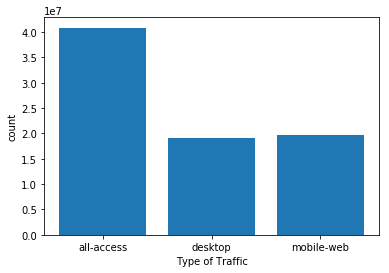

In [24]:
fig, ax = plt.subplots()
ax.bar(new.index, new)
ax.set_xlabel('Type of Traffic')
ax.set_ylabel('count')
plt.show()

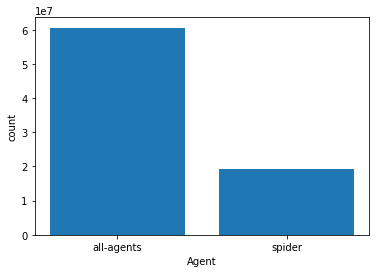

In [25]:
new = train_1_melted.groupby('Agent')['Agent'].count()
fig, ax = plt.subplots()
ax.bar(new.index, new)
ax.set_xlabel('Agent')
ax.set_ylabel('count')
plt.show()

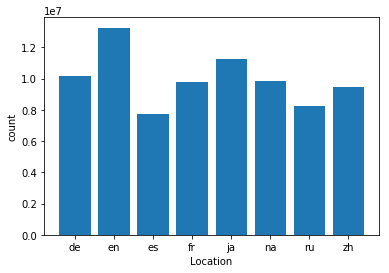

In [26]:
new = train_1_melted.groupby('location')['location'].count()
fig, ax = plt.subplots()
ax.bar(new.index, new)
ax.set_xlabel('Location')
ax.set_ylabel('count')
plt.show()

In [27]:
new = train_1_melted[train_1_melted['Page']=='2NE1_zh.wikipedia.org']

In [28]:
print(new.head())

                         Page Type_of_traffic       Agent location       Date  \
0       2NE1_zh.wikipedia.org      all-access      spider       zh 2015-07-01   
27965   2NE1_zh.wikipedia.org      all-access  all-agents       zh 2015-07-01   
60570   2NE1_zh.wikipedia.org         desktop  all-agents       zh 2015-07-01   
105110  2NE1_zh.wikipedia.org      mobile-web  all-agents       zh 2015-07-01   
145063  2NE1_zh.wikipedia.org      all-access      spider       zh 2015-07-02   

        count  weekday  
0        18.0        2  
27965   785.0        2  
60570   540.0        2  
105110  238.0        2  
145063   11.0        3  


In [29]:
new_1 = new.groupby(['Date','Type_of_traffic', 'Agent'])['count'].sum()
print(new_1)

Date        Type_of_traffic  Agent     
2015-07-01  all-access       all-agents    785.0
                             spider         18.0
            desktop          all-agents    540.0
            mobile-web       all-agents    238.0
2015-07-02  all-access       all-agents    725.0
                             spider         11.0
            desktop          all-agents    514.0
            mobile-web       all-agents    211.0
2015-07-03  all-access       all-agents    641.0
                             spider          5.0
            desktop          all-agents    400.0
            mobile-web       all-agents    239.0
2015-07-04  all-access       all-agents    704.0
                             spider         13.0
            desktop          all-agents    458.0
            mobile-web       all-agents    244.0
2015-07-05  all-access       all-agents    690.0
                             spider         14.0
            desktop          all-agents    467.0
            mobile-web       

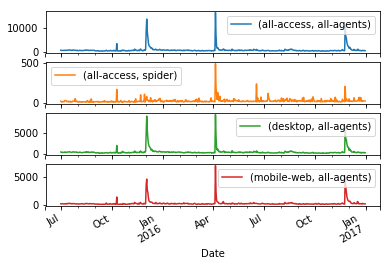

In [30]:
new_1.unstack(level=[1,2]).plot(kind = 'line', subplots = True)
plt.show()